# Data Collection

#### Import

In [18]:
import hashlib
from datetime import datetime
from pathlib import Path
from textwrap import dedent
import pandas as pd

#### Data

In [19]:
df_FA = pd.read_csv("Food Access Research Atlas.csv")
df_Place = pd.read_csv("PLACES_Better_Health_County_Data.csv")

In [20]:
df_FA.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [21]:
df_Place.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2021,TX,Texas,Potter,BRFSS,Health Outcomes,Current asthma among adults aged >=18 years,%,Crude prevalence,10.1,...,NaN,8.9,11.5,116547,48375,HLTHOUT,CASTHMA,CrdPrv,Current Asthma,POINT (-101.893804 35.3986751)
1,2021,TN,Tennessee,Trousdale,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,25.4,...,NaN,21.8,29.1,12035,47169,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-86.1566909 36.3930297)
2,2021,TX,Texas,Shackelford,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,29.0,...,NaN,26.5,31.7,3212,48417,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-99.3470045 32.7438198)
3,2021,VT,Vermont,Orleans,BRFSS,Disability,Any disability among adults aged >=18 years,%,Crude prevalence,29.0,...,NaN,25.1,33.5,27546,50019,DISABLT,DISABILITY,CrdPrv,Any Disability,POINT (-72.25163 44.8284417)
4,2020,UT,Utah,Summit,BRFSS,Health Outcomes,All teeth lost among adults aged >=65 years,%,Crude prevalence,6.3,...,NaN,3.5,9.9,43093,49043,HLTHOUT,TEETHLOST,CrdPrv,All Teeth Lost,POINT (-110.9684862 40.8720603)


#### Define the file path

In [22]:
fa_path = Path("Food Access Research Atlas.csv")
places_path = Path("PLACES_Better_Health_County_Data.csv")

#### File-level metadata + SHA-256 integrity verification (fixity)

In [23]:
metadata_dir = Path("metadata")
metadata_dir.mkdir(exist_ok=True)

def describe_file(path: Path) -> dict:
    """Return the basic metadata of the file along with the SHA-256 hash"""
    if not path.exists():
        raise FileNotFoundError(path)
        
    stat = path.stat()
    sha = hashlib.sha256(path.read_bytes()).hexdigest()
    
    return {
        "file_name": path.name,
        "absolute_path": str(path.resolve()),
        "size_bytes": stat.st_size,
        "size_MB": round(stat.st_size / 1024 / 1024, 2),
        "last_modified_local": datetime.fromtimestamp(stat.st_mtime).isoformat(timespec="seconds"),
        "sha256": sha,
    }

meta_fa = describe_file(fa_path)
meta_places = describe_file(places_path)

meta_df = pd.DataFrame([meta_fa, meta_places])
meta_df

,file_name,absolute_path,size_bytes,size_MB,last_modified_local,sha256
0,Food Access Research Atlas.csv,C:\Users\rjy\Desktop\IS-477-Team-Project\Food ...,47053488,44.87,2021-04-21T16:18:39,00a721633e5ab59f123273ca7d2d10fa191641631bf678...
1,PLACES_Better_Health_County_Data.csv,C:\Users\rjy\Desktop\IS-477-Team-Project\PLACE...,53180359,50.72,2025-11-13T10:48:49,5ff00ee82b4895273ab55a855300029ceaaa3be2286e41...


#### Save this metadata as a "log_path" file

In [24]:
log_path = metadata_dir / "data_collection_log.csv"
meta_df.to_csv(log_path, index=False)
log_path

WindowsPath('metadata/data_collection_log.csv')

#### Quick sanity checks on the data (tiny “pilot slice”)

In [25]:
print("\n=== Dataset shapes (rows, columns) ===")
print("Food Access Research Atlas:", df_FA.shape)
print("PLACES Better Health County:", df_Place.shape)

print("\n=== Food Access Research Atlas - first 5 rows ===")
display(df_FA.head())

print("\n=== PLACES Better Health County - first 5 rows ===")
display(df_Place.head())


=== Dataset shapes (rows, columns) ===
Food Access Research Atlas: (72531, 147)
PLACES Better Health County: (228770, 21)

=== Food Access Research Atlas - first 5 rows ===


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0



=== PLACES Better Health County - first 5 rows ===


,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2021,TX,Texas,Potter,BRFSS,Health Outcomes,Current asthma among adults aged >=18 years,%,Crude prevalence,10.1,...,NaN,8.9,11.5,116547,48375,HLTHOUT,CASTHMA,CrdPrv,Current Asthma,POINT (-101.893804 35.3986751)
1,2021,TN,Tennessee,Trousdale,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,25.4,...,NaN,21.8,29.1,12035,47169,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-86.1566909 36.3930297)
2,2021,TX,Texas,Shackelford,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,29.0,...,NaN,26.5,31.7,3212,48417,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-99.3470045 32.7438198)
3,2021,VT,Vermont,Orleans,BRFSS,Disability,Any disability among adults aged >=18 years,%,Crude prevalence,29.0,...,NaN,25.1,33.5,27546,50019,DISABLT,DISABILITY,CrdPrv,Any Disability,POINT (-72.25163 44.8284417)
4,2020,UT,Utah,Summit,BRFSS,Health Outcomes,All teeth lost among adults aged >=65 years,%,Crude prevalence,6.3,...,NaN,3.5,9.9,43093,49043,HLTHOUT,TEETHLOST,CrdPrv,All Teeth Lost,POINT (-110.9684862 40.8720603)


# Storage & organization

#### Matching code for Storage & organization

In [26]:
from pathlib import Path
import pandas as pd
import duckdb

# -------------------------------------------------------------------

# -------------------------------------------------------------------
# 2. Curate and organize Food Access Research Atlas (tract-level)
# -------------------------------------------------------------------

# Candidate columns we would like to keep if present
fa_keep_candidates = [
    "CensusTract", "State", "County", "Urban", "POP2010",
    "TractLOWI", "TractHUNV", "TractSNAP",
    # some common low-access fields; keep only if they exist
    "LAPOP1_10", "LAPOP05_1", "LAPOP1_20", "LAPOP10_20"
]

fa_keep = [c for c in fa_keep_candidates if c in df_FA.columns]
df_fa_curated = df_FA[fa_keep].copy()

# Standardize geographic keys
if "CensusTract" in df_fa_curated.columns:
    df_fa_curated["tract_geoid"] = (
        df_fa_curated["CensusTract"].astype(str).str.split(".").str[0].str.zfill(11)
    )
    df_fa_curated["county_fips"] = df_fa_curated["tract_geoid"].str[:5]

# Make sure county_fips is string-typed if it exists
if "county_fips" in df_fa_curated.columns:
    df_fa_curated["county_fips"] = df_fa_curated["county_fips"].astype(str).str.zfill(5)

# Optional: rename to snake_case style
fa_rename = {
    "State": "state_name",
    "County": "county_name",
    "Urban": "urban_flag",
    "POP2010": "pop2010",
}
df_fa_curated = df_fa_curated.rename(columns={k: v for k, v in fa_rename.items() if k in df_fa_curated.columns})

# -------------------------------------------------------------------
# 3. Curate and organize PLACES county data
# -------------------------------------------------------------------

places_keep_candidates = [
    "StateAbbr", "StateDesc", "CountyName",
    "CountyFIPS", "LocationID",
    "MeasureId", "Measure", "Category",
    "Data_Value", "Data_Value_Type", "Year"
]

places_keep = [c for c in places_keep_candidates if c in df_Place.columns]
df_places_curated = df_Place[places_keep].copy()

# Standardize county FIPS
if "CountyFIPS" in df_places_curated.columns:
    df_places_curated["county_fips"] = (
        df_places_curated["CountyFIPS"].astype(str).str.split(".").str[0].str.zfill(5)
    )
elif "LocationID" in df_places_curated.columns:
    df_places_curated["county_fips"] = (
        df_places_curated["LocationID"].astype(str).str.split(".").str[0].str.zfill(5)
    )

# Filter down to a few key health measures (if MeasureId exists)
health_measures = ["OBESITY", "DIABETES"]
if "MeasureId" in df_places_curated.columns:
    df_places_curated = df_places_curated[
        df_places_curated["MeasureId"].isin(health_measures)
    ].copy()

# Rename to cleaner column names where present
places_rename = {
    "StateAbbr": "state_abbr",
    "StateDesc": "state_name",
    "CountyName": "county_name",
    "MeasureId": "measure_id",
    "Measure": "measure_label",
    "Category": "measure_category",
    "Data_Value": "data_value",
    "Data_Value_Type": "data_value_type",
}
df_places_curated = df_places_curated.rename(
    columns={k: v for k, v in places_rename.items() if k in df_places_curated.columns}
)

# Ensure numeric data_value column is float if present
if "data_value" in df_places_curated.columns:
    df_places_curated["data_value"] = pd.to_numeric(
        df_places_curated["data_value"], errors="coerce"
    )

# -------------------------------------------------------------------
# 4. Persist curated tables to Parquet (interim storage)
# -------------------------------------------------------------------

fa_parquet_path = INTERIM_DIR / "fara_tract.parquet"
places_parquet_path = INTERIM_DIR / "places_county.parquet"

df_fa_curated.to_parquet(fa_parquet_path, index=False)
df_places_curated.to_parquet(places_parquet_path, index=False)

print("Saved curated FARA tract data to:", fa_parquet_path)
print("Saved curated PLACES county data to:", places_parquet_path)

# -------------------------------------------------------------------
# 5. Mirror into DuckDB for SQL-based work
# -------------------------------------------------------------------

duckdb_path = INTERIM_DIR / "pipeline.duckdb"
con = duckdb.connect(str(duckdb_path))

con.register("fara_df", df_fa_curated)
con.register("places_df", df_places_curated)

con.execute("CREATE OR REPLACE TABLE fara_tract AS SELECT * FROM fara_df")
con.execute("CREATE OR REPLACE TABLE places_county AS SELECT * FROM places_df")

con.close()
print("DuckDB schema written to:", duckdb_path)

# Quick preview
print("\nFARA curated columns:", df_fa_curated.columns.tolist())
print("PLACES curated columns:", df_places_curated.columns.tolist())


Saved curated FARA tract data to: C:\Users\rjy\Desktop\IS-477-Team-Project\data\interim\fara_tract.parquet
Saved curated PLACES county data to: C:\Users\rjy\Desktop\IS-477-Team-Project\data\interim\places_county.parquet
DuckDB schema written to: C:\Users\rjy\Desktop\IS-477-Team-Project\data\interim\pipeline.duckdb

FARA curated columns: ['CensusTract', 'state_name', 'county_name', 'urban_flag', 'TractLOWI', 'TractHUNV', 'TractSNAP', 'LAPOP1_10', 'LAPOP1_20', 'tract_geoid', 'county_fips']
PLACES curated columns: ['state_abbr', 'state_name', 'LocationID', 'measure_id', 'measure_label', 'measure_category', 'data_value', 'data_value_type', 'Year', 'county_fips']


# Integration

In [27]:
# 1. Paths and load curated data
# -------------------------------------------------------------------

PROJECT_ROOT = Path(".").resolve()
DATA_DIR = PROJECT_ROOT / "data"
INTERIM_DIR = DATA_DIR / "interim"
PROCESSED_DIR = DATA_DIR / "processed"

PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

fa_parquet_path = INTERIM_DIR / "fara_tract.parquet"
places_parquet_path = INTERIM_DIR / "places_county.parquet"

df_fa = pd.read_parquet(fa_parquet_path)
df_places = pd.read_parquet(places_parquet_path)

print("FARA curated shape:", df_fa.shape)
print("PLACES curated shape:", df_places.shape)

# -------------------------------------------------------------------
# 2. Aggregate tract-level FARA data to county level
# -------------------------------------------------------------------

# We aggregate by county_fips only (county names will come from PLACES)
if "county_fips" not in df_fa.columns:
    raise ValueError("county_fips not found in FARA curated table.")

agg_dict = {}

# sum population
if "pop2010" in df_fa.columns:
    agg_dict["pop2010"] = "sum"

# sum low-income / low-access counts where available
for col in [
    "TractLOWI", "TractHUNV", "TractSNAP",
    "LAPOP1_10", "LAPOP05_1", "LAPOP1_20", "LAPOP10_20"
]:
    if col in df_fa.columns:
        agg_dict[col] = "sum"

df_fa_county = df_fa.groupby("county_fips", as_index=False).agg(agg_dict)

# Optional: derive rates (e.g., share of population that is low income)
if "pop2010" in df_fa_county.columns:
    for col in ["TractLOWI", "TractHUNV", "TractSNAP"]:
        if col in df_fa_county.columns:
            rate_col = col.lower() + "_rate"
            df_fa_county[rate_col] = df_fa_county[col] / df_fa_county["pop2010"]

print("FARA aggregated to county level:", df_fa_county.shape)

# -------------------------------------------------------------------
# 3. Reshape PLACES county data: wide format by MeasureId
# -------------------------------------------------------------------

if "county_fips" not in df_places.columns:
    raise ValueError("county_fips not found in PLACES curated table.")

# Use the latest year if a Year column exists
df_places_latest = df_places.copy()
if "Year" in df_places.columns:
    latest_year = df_places["Year"].max()
    df_places_latest = df_places[df_places["Year"] == latest_year].copy()
    print("Using PLACES year:", latest_year)

id_cols = ["county_fips"]
for col in ["state_abbr", "state_name", "county_name"]:
    if col in df_places_latest.columns:
        id_cols.append(col)

if "measure_id" not in df_places_latest.columns:
    raise ValueError("measure_id not found in PLACES curated table.")
if "data_value" not in df_places_latest.columns:
    raise ValueError("data_value not found in PLACES curated table.")

df_places_wide = (
    df_places_latest
    .pivot_table(
        index=id_cols,
        columns="measure_id",
        values="data_value",
        aggfunc="mean"
    )
    .reset_index()
)

# Flatten MultiIndex columns if needed
df_places_wide.columns = [
    c if not isinstance(c, tuple) else c[-1]
    for c in df_places_wide.columns
]

print("PLACES wide shape:", df_places_wide.shape)
print("PLACES measures available:", [c for c in df_places_wide.columns if c not in id_cols])

# -------------------------------------------------------------------
# 4. Join FARA (county) with PLACES (county)
# -------------------------------------------------------------------

df_integrated = pd.merge(
    df_fa_county,
    df_places_wide,
    on="county_fips",
    how="inner",
    validate="one_to_one"
)

print("Integrated dataset shape:", df_integrated.shape)

# Quick peek
df_integrated.head()

FARA curated shape: (72531, 11)
PLACES curated shape: (12308, 10)
FARA aggregated to county level: (3142, 6)
Using PLACES year: 2021
PLACES wide shape: (3077, 5)
PLACES measures available: ['DIABETES', 'OBESITY']
Integrated dataset shape: (3074, 10)


,county_fips,TractLOWI,TractHUNV,TractSNAP,LAPOP1_10,LAPOP1_20,state_abbr,state_name,DIABETES,OBESITY
0,01001,17243.0,1191.0,2692.0,18503.0,13384.0,AL,Alabama,11.50,39.10
1,01003,57843.0,2705.0,5926.0,45789.0,43481.0,AL,Alabama,11.20,37.30
2,01005,12073.0,849.0,2516.0,5636.0,993.0,AL,Alabama,17.00,43.35
3,01007,7968.0,410.0,849.0,365.0,0.0,AL,Alabama,13.25,39.75
4,01009,20795.0,856.0,1966.0,3902.0,3902.0,AL,Alabama,11.65,37.80


In [28]:
# -------------------------------------------------------------------
# 5. Save integrated dataset and (optionally) mirror into DuckDB
# -------------------------------------------------------------------

integrated_parquet_path = PROCESSED_DIR / "county_food_access_health.parquet"
df_integrated.to_parquet(integrated_parquet_path, index=False)
print("Integrated dataset saved to:", integrated_parquet_path)

duckdb_path = INTERIM_DIR / "pipeline.duckdb"
con = duckdb.connect(str(duckdb_path))
con.register("integrated_df", df_integrated)
con.execute("CREATE OR REPLACE TABLE county_food_access_health AS SELECT * FROM integrated_df")
con.close()
print("Integrated table written to DuckDB at:", duckdb_path)


Integrated dataset saved to: C:\Users\rjy\Desktop\IS-477-Team-Project\data\processed\county_food_access_health.parquet
Integrated table written to DuckDB at: C:\Users\rjy\Desktop\IS-477-Team-Project\data\interim\pipeline.duckdb


# Data quality assessment

In [ ]:
# --- 1a. FARA: go from tract to county using CensusTract -> county FIPS ---

# Make tract_geoid (11 digits) and county_fips (first 5 digits)
df_FA["tract_geoid"] = df_FA["CensusTract"].astype(str).str.split(".").str[0].str.zfill(11)
df_FA["county_fips"] = df_FA["tract_geoid"].str[:5]

# Aggregate some key columns to county level (sums)
agg_cols = ["Pop2010", "LAPOP1_10", "LALOWI1_10"]
agg_dict = {c: "sum" for c in agg_cols}

df_fa_county = (
    df_FA
    .groupby("county_fips", as_index=False)
    .agg(agg_dict)
)

# Derive simple rates for food access
df_fa_county["LAPOP1_10_rate"] = df_fa_county["LAPOP1_10"] / df_fa_county["Pop2010"]
df_fa_county["LALOWI1_10_rate"] = df_fa_county["LALOWI1_10"] / df_fa_county["Pop2010"]

print("FARA (county-level) shape:", df_fa_county.shape)
df_fa_county.head()


FARA (county-level) shape: (3142, 6)


,county_fips,Pop2010,LAPOP1_10,LALOWI1_10,LAPOP1_10_rate,LALOWI1_10_rate
0,01001,54571,18503.0,7106.0,0.339063,0.130216
1,01003,182265,45789.0,14468.0,0.251222,0.079379
2,01005,27457,5636.0,2864.0,0.205266,0.104309
3,01007,22915,365.0,102.0,0.015928,0.004451
4,01009,57322,3902.0,1440.0,0.068072,0.025121


In [42]:
# --- 1b. PLACES: keep latest year, only OBESITY + DIABETES, wide format ---

# county_fips from LocationID (already county FIPS)
df_Place["county_fips"] = df_Place["LocationID"].astype(str).str.zfill(5)

latest_year = df_Place["Year"].max()
df_places_latest = df_Place[df_Place["Year"] == latest_year].copy()
print("Using PLACES year:", latest_year)

# Keep only OBESITY and DIABETES measures
df_places_health = df_places_latest[
    df_places_latest["MeasureId"].isin(["OBESITY", "DIABETES"])
].copy()

id_cols = ["county_fips", "StateAbbr", "StateDesc", "LocationName"]

df_places_wide = (
    df_places_health
    .pivot_table(
        index=id_cols,
        columns="MeasureId",
        values="Data_Value",
        aggfunc="mean"
    )
    .reset_index()
)

# Flatten column index
df_places_wide.columns = [
    c if not isinstance(c, tuple) else c[-1]
    for c in df_places_wide.columns
]

print("PLACES (wide) shape:", df_places_wide.shape)
df_places_wide.head()


Using PLACES year: 2021
PLACES (wide) shape: (3076, 6)


,county_fips,StateAbbr,StateDesc,LocationName,DIABETES,OBESITY
0,01001,AL,Alabama,Autauga,11.50,39.10
1,01003,AL,Alabama,Baldwin,11.20,37.30
2,01005,AL,Alabama,Barbour,17.00,43.35
3,01007,AL,Alabama,Bibb,13.25,39.75
4,01009,AL,Alabama,Blount,11.65,37.80


In [43]:
# --- 1c. Join FARA (county) with PLACES (county) ---

df_int = pd.merge(
    df_fa_county,
    df_places_wide,
    on="county_fips",
    how="inner",
    validate="one_to_one"
)

print("Integrated df_int shape:", df_int.shape)
df_int.head()


Integrated df_int shape: (3074, 11)


,county_fips,Pop2010,LAPOP1_10,LALOWI1_10,LAPOP1_10_rate,LALOWI1_10_rate,StateAbbr,StateDesc,LocationName,DIABETES,OBESITY
0,01001,54571,18503.0,7106.0,0.339063,0.130216,AL,Alabama,Autauga,11.50,39.10
1,01003,182265,45789.0,14468.0,0.251222,0.079379,AL,Alabama,Baldwin,11.20,37.30
2,01005,27457,5636.0,2864.0,0.205266,0.104309,AL,Alabama,Barbour,17.00,43.35
3,01007,22915,365.0,102.0,0.015928,0.004451,AL,Alabama,Bibb,13.25,39.75
4,01009,57322,3902.0,1440.0,0.068072,0.025121,AL,Alabama,Blount,11.65,37.80


In [44]:
# -------------------------------------------------------------------
# 2. Structure, types, missingness
# -------------------------------------------------------------------

print("\nColumn dtypes:")
print(df_int.dtypes)

print("\nSummary statistics for numeric columns:")
display(df_int.describe().T)

missing_pct = (
    df_int.isna()
         .mean()
         .sort_values(ascending=False) * 100
).to_frame("pct_missing")

print("\nTop 15 columns by percent missing:")
display(missing_pct.head(15))



Column dtypes:
county_fips         object
Pop2010              int64
LAPOP1_10          float64
LALOWI1_10         float64
LAPOP1_10_rate     float64
LALOWI1_10_rate    float64
StateAbbr           object
StateDesc           object
LocationName        object
DIABETES           float64
OBESITY            float64
dtype: object

Summary statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
Pop2010,3074.0,94318.344828,308369.957586,82.00,10957.500000,25425.500000,64629.750000,9.818605e+06
LAPOP1_10,3074.0,20785.918022,52624.009022,0.00,1664.250000,4532.500000,14478.000000,7.949600e+05
LALOWI1_10,3074.0,5662.210800,13702.167577,0.00,549.750000,1660.500000,4800.000000,2.363460e+05
LAPOP1_10_rate,3074.0,0.243049,0.186748,0.00,0.118745,0.213455,0.321751,1.000000e+00
LALOWI1_10_rate,3074.0,0.084141,0.074591,0.00,0.036349,0.066267,0.108167,6.259273e-01
DIABETES,3074.0,11.711044,2.381758,5.90,10.050000,11.350000,13.000000,2.320000e+01
OBESITY,3074.0,37.334027,4.527643,17.15,35.050000,37.600000,40.200000,5.170000e+01



Top 15 columns by percent missing:


,pct_missing
county_fips,0.0
Pop2010,0.0
LAPOP1_10,0.0
LALOWI1_10,0.0
LAPOP1_10_rate,0.0
LALOWI1_10_rate,0.0
StateAbbr,0.0
StateDesc,0.0
LocationName,0.0
DIABETES,0.0


In [45]:
# -------------------------------------------------------------------
# 3. Range checks, non-negativity, key uniqueness
# -------------------------------------------------------------------

# 3a. prevalence variables: 0–100 expected
for col in ["OBESITY", "DIABETES"]:
    if col in df_int.columns:
        bad = df_int[
            df_int[col].notna() & ((df_int[col] < 0) | (df_int[col] > 100))
        ]
        print(f"\n{col}: out-of-range rows (expected 0–100):", len(bad))
        if len(bad) > 0:
            display(bad[["county_fips", "StateAbbr", "StateDesc", "LocationName", col]].head())

# 3b. count variables should be non-negative
for col in ["Pop2010", "LAPOP1_10", "LALOWI1_10"]:
    if col in df_int.columns:
        bad = df_int[df_int[col].notna() & (df_int[col] < 0)]
        print(f"{col}: negative values:", len(bad))

# 3c. FIPS key uniqueness
dup_fips = df_int["county_fips"].duplicated().sum()
print("\nDuplicated county_fips:", dup_fips)



OBESITY: out-of-range rows (expected 0–100): 0

DIABETES: out-of-range rows (expected 0–100): 0
Pop2010: negative values: 0
LAPOP1_10: negative values: 0
LALOWI1_10: negative values: 0

Duplicated county_fips: 0


#### Research question (primary):

Do counties with worse food access show higher obesity and diabetes?

In [46]:
# -------------------------------------------------------------------
# 4. Primary RQ: LAPOP1_10_rate vs OBESITY / DIABETES
# -------------------------------------------------------------------

key_cols = ["LAPOP1_10_rate", "OBESITY", "DIABETES"]
analysis_df = df_int.dropna(subset=key_cols).copy()
print("Rows used for primary analysis:", analysis_df.shape[0])

# Quartiles of food access (higher rate = worse access)
analysis_df["access_quartile"] = pd.qcut(
    analysis_df["LAPOP1_10_rate"],
    4,
    labels=["Q1_best_access", "Q2", "Q3", "Q4_worst_access"]
)

group_means = (
    analysis_df
    .groupby("access_quartile")[["LAPOP1_10_rate", "OBESITY", "DIABETES"]]
    .mean()
    .reset_index()
)

print("\nMean obesity/diabetes by food-access quartile:")
display(group_means)

# Correlations
corr_matrix = analysis_df[["LAPOP1_10_rate", "OBESITY", "DIABETES"]].corr()
print("\nCorrelation matrix (LAPOP1_10_rate vs outcomes):")
display(corr_matrix)


Rows used for primary analysis: 3074

Mean obesity/diabetes by food-access quartile:


C:\Users\rjy\AppData\Local\Temp\ipykernel_8808\3302244352.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("access_quartile")[["LAPOP1_10_rate", "OBESITY", "DIABETES"]]


,access_quartile,LAPOP1_10_rate,OBESITY,DIABETES
0,Q1_best_access,0.058877,37.602471,12.037906
1,Q2,0.167335,37.319271,11.613867
2,Q3,0.265160,37.283398,11.532617
3,Q4_worst_access,0.480756,37.130884,11.659428



Correlation matrix (LAPOP1_10_rate vs outcomes):


,LAPOP1_10_rate,OBESITY,DIABETES
LAPOP1_10_rate,1.000000,-0.036238,-0.039654
OBESITY,-0.036238,1.000000,0.698677
DIABETES,-0.039654,0.698677,1.000000


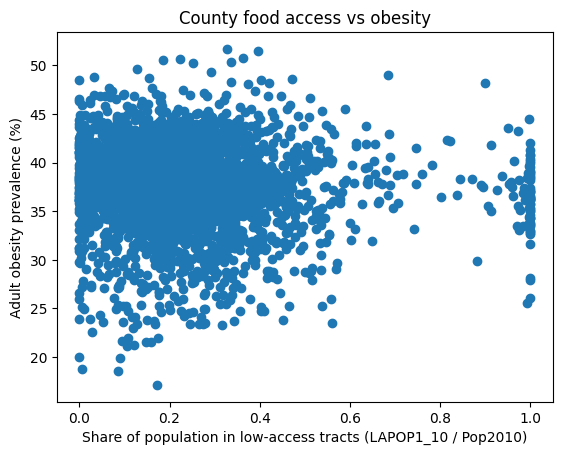

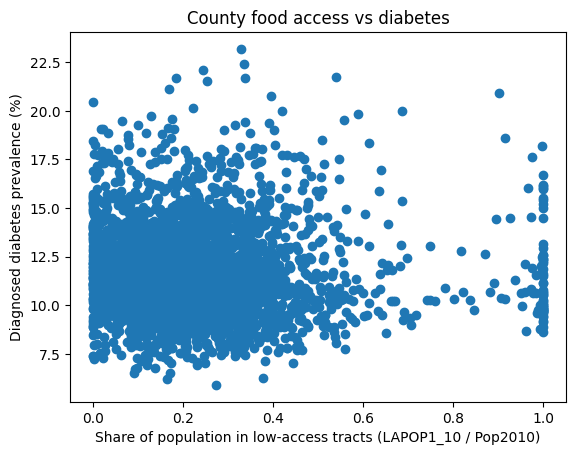

In [47]:
# -------------------------------------------------------------------
# 5. Visualizations for primary RQ
# -------------------------------------------------------------------

plt.figure()
plt.scatter(analysis_df["LAPOP1_10_rate"], analysis_df["OBESITY"])
plt.xlabel("Share of population in low-access tracts (LAPOP1_10 / Pop2010)")
plt.ylabel("Adult obesity prevalence (%)")
plt.title("County food access vs obesity")
plt.show()

plt.figure()
plt.scatter(analysis_df["LAPOP1_10_rate"], analysis_df["DIABETES"])
plt.xlabel("Share of population in low-access tracts (LAPOP1_10 / Pop2010)")
plt.ylabel("Diagnosed diabetes prevalence (%)")
plt.title("County food access vs diabetes")
plt.show()


#### Secondary Research Question (a)

Does the association differ for urban vs rural counties?

In [48]:
# -------------------------------------------------------------------
# 6. Urban vs rural: compute urban_share for each county
# -------------------------------------------------------------------

urban_share = (
    df_FA
    .groupby("county_fips", as_index=False)["Urban"]
    .mean()
    .rename(columns={"Urban": "urban_share"})
)

df_int_urb = df_int.merge(urban_share, on="county_fips", how="left")

df_int_urb["urban_category"] = pd.cut(
    df_int_urb["urban_share"],
    bins=[-0.01, 0.25, 0.75, 1.01],
    labels=["mostly_rural", "mixed", "mostly_urban"]
)

print("\nurban_category value counts:")
print(df_int_urb["urban_category"].value_counts(dropna=False))



urban_category value counts:
urban_category
mostly_rural    1416
mixed           1244
mostly_urban     414
Name: count, dtype: int64


Rows used for urban/rural analysis: 3074

Mean access & outcomes by urban category:


C:\Users\rjy\AppData\Local\Temp\ipykernel_8808\1446221638.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("urban_category")[["LAPOP1_10_rate", "OBESITY", "DIABETES"]]


,urban_category,LAPOP1_10_rate,OBESITY,DIABETES
0,mostly_rural,0.223206,38.058510,12.207592
1,mixed,0.255981,37.568127,11.493690
2,mostly_urban,0.272060,34.152657,10.665821


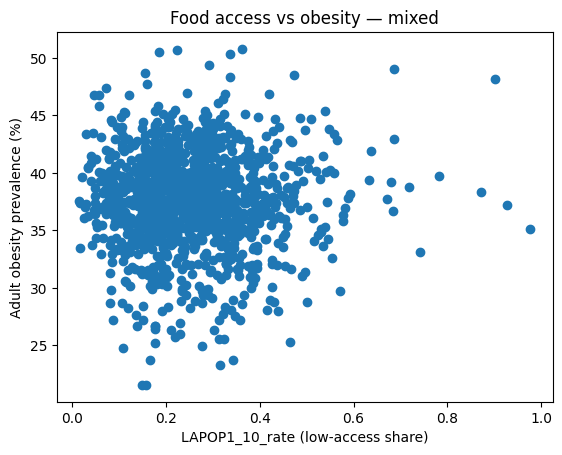

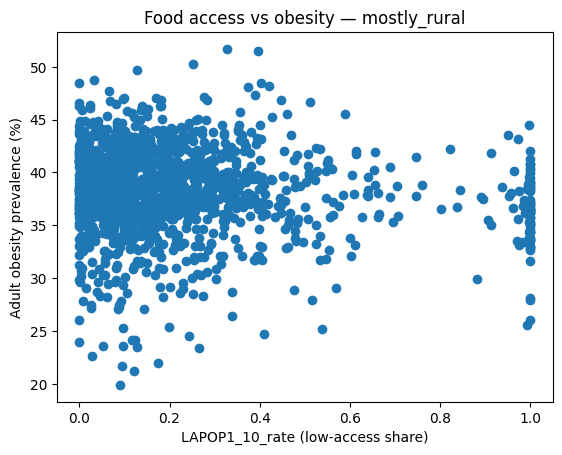

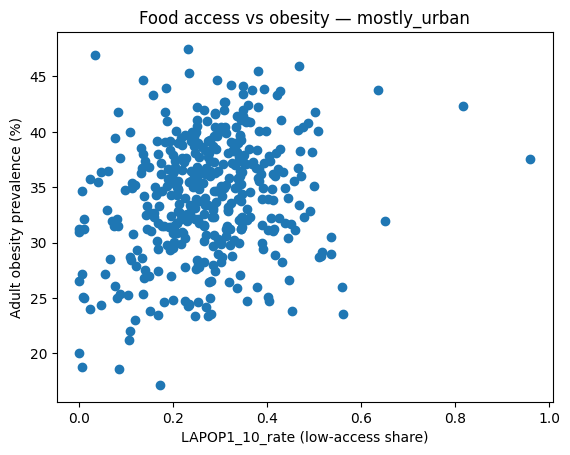

In [49]:
# -------------------------------------------------------------------
# 7. Compare relationships by urban_category
# -------------------------------------------------------------------

cols_needed = ["LAPOP1_10_rate", "OBESITY", "DIABETES", "urban_category"]
sec_df = df_int_urb.dropna(subset=cols_needed).copy()
print("Rows used for urban/rural analysis:", sec_df.shape[0])

urban_group = (
    sec_df
    .groupby("urban_category")[["LAPOP1_10_rate", "OBESITY", "DIABETES"]]
    .mean()
    .reset_index()
)

print("\nMean access & outcomes by urban category:")
display(urban_group)

# Simple scatterplots by urban category
for cat in sec_df["urban_category"].dropna().unique():
    sub = sec_df[sec_df["urban_category"] == cat]
    plt.figure()
    plt.scatter(sub["LAPOP1_10_rate"], sub["OBESITY"])
    plt.xlabel("LAPOP1_10_rate (low-access share)")
    plt.ylabel("Adult obesity prevalence (%)")
    plt.title(f"Food access vs obesity — {cat}")
    plt.show()


#### Secondary Research Question (b)

Which food-access indicators best explain differences between counties?

In [50]:
# -------------------------------------------------------------------
# 8. Compare multiple food-access indicators
# -------------------------------------------------------------------

candidate_access_vars = [c for c in ["LAPOP1_10_rate", "LALOWI1_10_rate"] if c in df_int.columns]
print("Candidate food-access variables:", candidate_access_vars)

corr_cols = candidate_access_vars + ["OBESITY", "DIABETES"]
corr_df = df_int[corr_cols].dropna(how="any")

corr_matrix_full = corr_df.corr()
corr_to_outcomes = corr_matrix_full.loc[candidate_access_vars, ["OBESITY", "DIABETES"]]
corr_to_outcomes = corr_to_outcomes.sort_values("OBESITY", ascending=False)

print("\nCorrelation of food-access indicators with health outcomes:")
display(corr_to_outcomes)


Candidate food-access variables: ['LAPOP1_10_rate', 'LALOWI1_10_rate']

Correlation of food-access indicators with health outcomes:


,OBESITY,DIABETES
LALOWI1_10_rate,0.158818,0.250845
LAPOP1_10_rate,-0.036238,-0.039654


# Data cleaning

In [52]:
from pathlib import Path
import pandas as pd
import numpy as np

# 1. Load integrated county-level data
PROJECT_ROOT = Path(".").resolve()
DATA_DIR = PROJECT_ROOT / "data"
PROCESSED_DIR = DATA_DIR / "processed"

integrated_path = PROCESSED_DIR / "county_food_access_health.parquet"
df_clean = pd.read_parquet(integrated_path)

print("Original integrated shape:", df_clean.shape)
df_clean.head()


Original integrated shape: (3074, 10)


,county_fips,TractLOWI,TractHUNV,TractSNAP,LAPOP1_10,LAPOP1_20,state_abbr,state_name,DIABETES,OBESITY
0,01001,17243.0,1191.0,2692.0,18503.0,13384.0,AL,Alabama,11.50,39.10
1,01003,57843.0,2705.0,5926.0,45789.0,43481.0,AL,Alabama,11.20,37.30
2,01005,12073.0,849.0,2516.0,5636.0,993.0,AL,Alabama,17.00,43.35
3,01007,7968.0,410.0,849.0,365.0,0.0,AL,Alabama,13.25,39.75
4,01009,20795.0,856.0,1966.0,3902.0,3902.0,AL,Alabama,11.65,37.80


In [53]:
# 2. Basic column standardization

rename_map = {
    "StateAbbr": "state_abbr",
    "StateDesc": "state_name",
    "LocationName": "county_name",
}
df_clean = df_clean.rename(columns=rename_map)

df_clean.columns


Index(['county_fips', 'TractLOWI', 'TractHUNV', 'TractSNAP', 'LAPOP1_10',
       'LAPOP1_20', 'state_abbr', 'state_name', 'DIABETES', 'OBESITY'],
      dtype='object')

In [54]:
# 3. Filter to 50 states + DC (drop territories)

territories = {"PR", "GU", "VI", "AS", "MP"}
mask_states = ~df_clean["state_abbr"].isin(territories)
df_clean = df_clean[mask_states].copy()

print("After dropping territories:", df_clean.shape)


After dropping territories: (3074, 10)


In [55]:
# 4. Handle impossible / implausible values

count_cols = ["Pop2010", "LAPOP1_10", "LALOWI1_10"]
for col in count_cols:
    if col in df_clean.columns:
        invalid = df_clean[col] < 0
        n_invalid = invalid.sum()
        if n_invalid > 0:
            print(f"{col}: converting {n_invalid} negative values to NaN")
            df_clean.loc[invalid, col] = np.nan

for col in ["OBESITY", "DIABETES"]:
    if col in df_clean.columns:
        invalid = (df_clean[col] < 0) | (df_clean[col] > 100)
        n_invalid = invalid.sum()
        if n_invalid > 0:
            print(f"{col}: converting {n_invalid} out-of-range values to NaN")
            df_clean.loc[invalid, col] = np.nan
